In [11]:
# 1.	Load the basic libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')

In [12]:
# 2.	Load the dataset

dataset = pd.read_csv("/content/yahoofinance.csv")
print(dataset.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2019-03-25  191.509995  191.979996  186.600006  188.740005  186.301483   
1  2019-03-26  191.660004  192.880005  184.580002  186.789993  184.376678   
2  2019-03-27  188.750000  189.759995  186.550003  188.470001  186.034973   
3  2019-03-28  188.949997  189.559998  187.529999  188.720001  186.281738   
4  2019-03-29  189.830002  190.080002  188.539993  189.949997  187.495865   

     Volume  
0  43845300  
1  49800500  
2  29848400  
3  20780400  
4  23564000  


In [13]:
# 3.	Analyse the dataset

# Summary statistics
print(dataset.describe())

# Dataset info
print(dataset.info())


             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   236.844229  239.629328  234.602332  237.338498  236.091135   
std     43.534331   44.316390   43.064055   43.892846   44.482641   
min    175.440002  177.919998  170.270004  173.300003  171.719727   
25%    201.410004  203.529999  199.669998  201.750000  200.239075   
50%    220.539993  222.490005  217.649994  220.699997  219.518402   
75%    267.480011  271.000000  265.390015  268.480011  267.844330   
max    324.739990  327.850006  323.350006  327.200012  327.200012   

             Volume  
count  2.530000e+02  
mean   3.164449e+07  
std    1.677487e+07  
min    1.136200e+07  
25%    2.114340e+07  
50%    2.655100e+07  
75%    3.480580e+07  
max    1.067212e+08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  ----

In [14]:
# 4.	Apply LSTM Model

# Extract the feature column for modeling
apple_training = dataset.iloc[:, 1:2].values

# Normalize the feature using Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
apple_training_scaled = scaler.fit_transform(apple_training)

# Create the feature set and labels
feature_set = []
labels = []

for i in range(60, 253):
    feature_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

# Convert to numpy arrays
feature_set = np.array(feature_set)
labels = np.array(labels)

# Reshape feature set for LSTM input
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

# Initialize the model
model = Sequential()

# Add LSTM layers with Dropout
model.add(LSTM(units=60, return_sequences=True, input_shape=(feature_set.shape[1], 1)))
model.add(Dropout(0.20))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

model.add(LSTM(units=60))
model.add(Dropout(0.20))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [15]:
# 5.	Apply the training over the dataset to minimize the loss

history = model.fit(feature_set, labels, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.0000e+00 - loss: 0.2080 - val_accuracy: 0.0256 - val_loss: 0.1115
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.0000e+00 - loss: 0.0283 - val_accuracy: 0.0256 - val_loss: 0.0404
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.0000e+00 - loss: 0.0179 - val_accuracy: 0.0256 - val_loss: 0.0407
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0256 - val_loss: 0.0950
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.0000e+00 - loss: 0.0083 - val_accuracy: 0.0256 - val_loss: 0.0503
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.0000e+00 - loss: 0.0063 - val_accuracy: 0.0256 - val_loss: 0.1485
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.0000e+00 - loss: 0.0044 - val_accuracy: 0.0256 - val_loss: 0.0979
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.0000e+00 - loss: 0

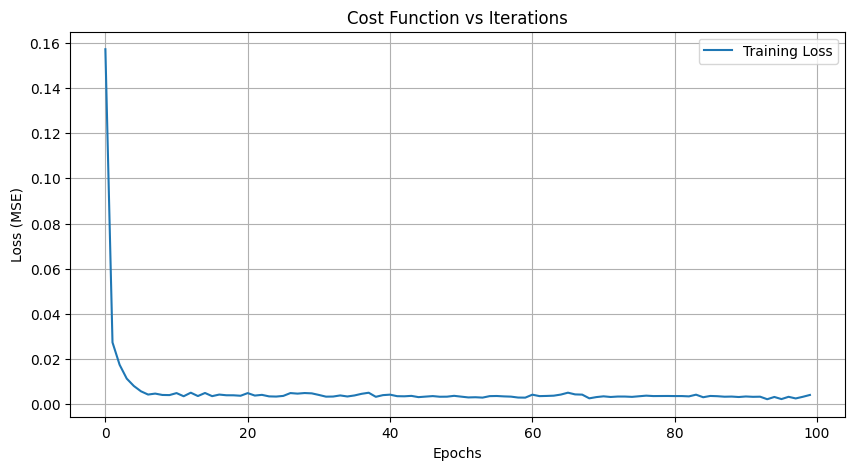

In [16]:
# 6.	Observe the cost function vs iterations learning curve

# Plot cost function (loss) vs iterations (epochs)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Cost Function vs Iterations')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Result

In [17]:
# a.	Model Summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60)                  │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,185 (1.17 MB)

 Trainable params: 102,061 (398.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204,124 (797.36 KB)

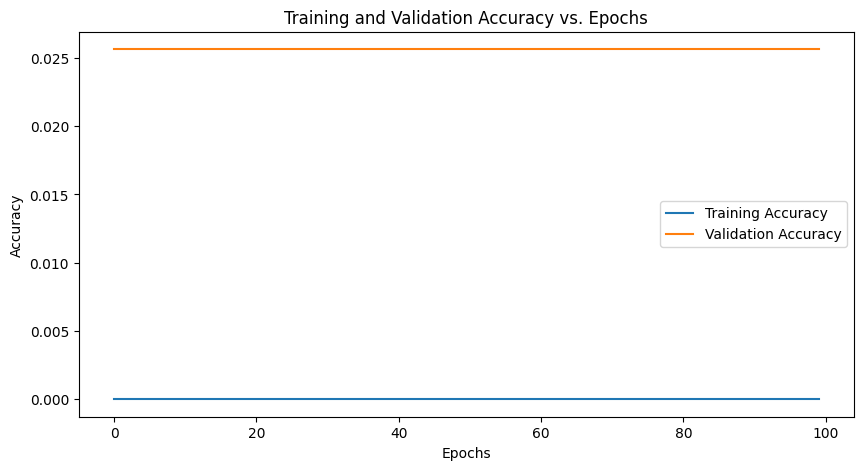

In [18]:
# b.	Training and Validation accuracy v/s epochs

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


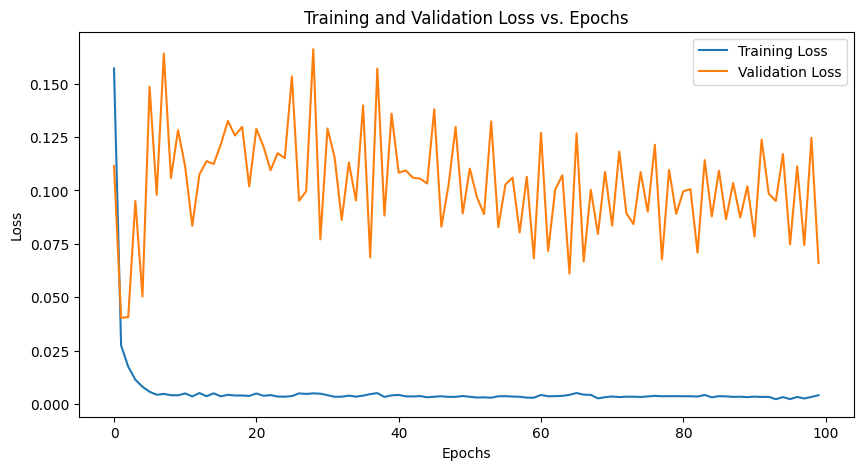

In [19]:
# c.	Training and Validation loss v/s epochs

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step


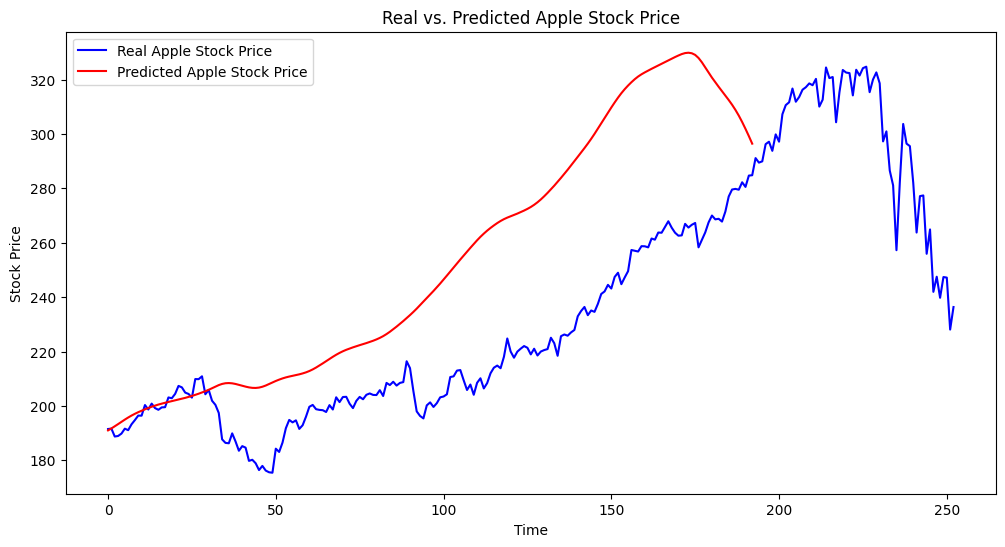

In [20]:
# d. Visualize the Predicted and originalStock Price

# Prepare testing data
testing_data = dataset.iloc[:, 1:2].values
test_feature = testing_data.reshape(-1, 1)
test_feature = scaler.transform(test_feature)

testing_features = []

for i in range(60, 253):
    testing_features.append(test_feature[i-60:i, 0])

testing_features = np.array(testing_features)
testing_features = np.reshape(testing_features, (testing_features.shape[0], testing_features.shape[1], 1))

# Predict the stock prices
predictions = model.predict(testing_features)
predictions = scaler.inverse_transform(predictions)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(testing_data, color='blue', label='Real Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Real vs. Predicted Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()